In [146]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import sympy as sym
import pandas as pd

In [147]:
t_detect = [5.1,9.9,14.5,20,19]
t_osc =  [4.9,10.2,15.1,21.2,25]

plt.scatter(t_osc, t_detect)
plt.xlabel("Tiempo medido por el oscilador (μs)")
plt.ylabel("Tiempo medido por el software (μs)")
plt.grid(which = "major")

In [148]:
def expfunction(x,A,B,C):
    return A*np.exp(-x*B)+C

def expfunction2(x,A,B):
    return A*np.exp(-x*B)

def linearfunction(x,A,B):
    return A*x + B

In [149]:
DataFrame1 = pd.read_csv('24-10-15-11-21.data', usecols=[0], names=['time_rawdata'], sep=' ')
DataFrame1 = DataFrame1[DataFrame1['time_rawdata'] < 20000]

DataFrame2 = pd.read_csv('24-10-18-17-18.data', usecols=[0], names=['time_rawdata'], sep=' ')
DataFrame2 = DataFrame2[DataFrame2['time_rawdata'] < 20000]


In [150]:
times_rawdata1 = DataFrame1['time_rawdata']/1000
times_rawdata2 = DataFrame2['time_rawdata']/1000
times_rawdata3 = DataFrame3["time_rawdata"]/1000

In [151]:
len(times_rawdata1), len(times_rawdata2), len(times_rawdata3)

(2066, 9225, 228013)

<IPython.core.display.Javascript object>


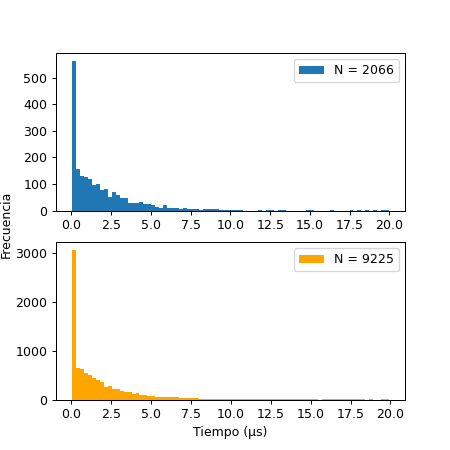

In [157]:
fig, ax = plt.subplots(2,1, figsize=(5,5))

ax[0].hist(times_rawdata1, bins=80,label="N = 2066")
ax[1].hist(times_rawdata2, bins=80,label="N = 9225", color="orange")
#plt.ylabel("Frecuencia")
plt.xlabel("Tiempo (μs)")
ax[0].legend()
ax[1].legend()
fig.text(0.0001, 0.5, 'Frecuencia', va='center', rotation='vertical')
plt.show()


In [160]:
F1, N1 = np.histogram(times_rawdata1, bins=80)

<IPython.core.display.Javascript object>


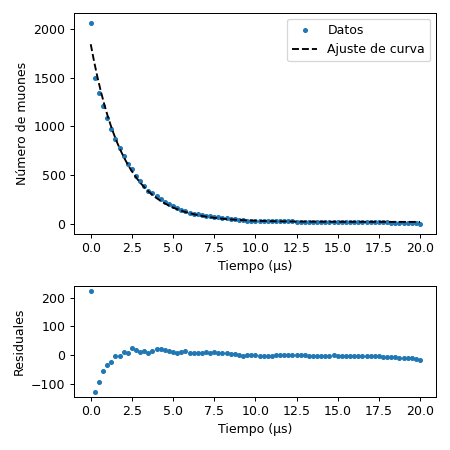

C:\Users\Acer\AppData\Local\Temp\ipykernel_19508\1277222602.py:2: RuntimeWarning: overflow encountered in exp
  return A*np.exp(-x*B)+C


In [161]:
fig, ax = plt.subplots(2,1, figsize=(5,5),gridspec_kw={'height_ratios': [2, 1]})

time_fit1 = np.linspace(0,20,81)
time_graph1 = np.linspace(0,20,100)
muon_graph1 = np.array([len(times_rawdata1)]) 

for i in range(0, len(F1)):
    muon_graph1 = np.append(muon_graph1, muon_graph1[i] - F1[i])
    
params1, pcov1 = scipy.optimize.curve_fit(expfunction, time_fit1, muon_graph1)

residuals1 = muon_graph1 - expfunction(time_fit1,*params1)
    
ax[0].scatter(time_fit1,muon_graph1,label="Datos",marker=".")
ax[0].plot(time_graph1, expfunction(time_graph1,*params1),linestyle="--",label="Ajuste de curva",color="k")
ax[0].set_xlabel("Tiempo (μs)")
ax[0].set_ylabel("Número de muones")
ax[0].legend()

ax[1].scatter(time_fit1, residuals1, marker=".")
ax[1].set_ylabel("Residuales")
ax[1].set_xlabel("Tiempo (μs)")
plt.tight_layout()

plt.show()

In [163]:
F2, N2 = np.histogram(times_rawdata2, bins=80)
F2,N2

(array([3067,  635,  633,  541,  496,  446,  403,  348,  264,  269,  209,
         215,  168,  145,  149,  119,  133,   91,   88,   81,   66,   52,
          51,   52,   53,   42,   41,   24,   23,   22,   24,   28,   20,
          18,   12,   15,    7,   15,   13,   13,   13,   11,    7,    4,
           9,    3,    5,    7,    2,    8,    3,    3,    5,    2,    5,
           2,    5,    1,    1,    2,    4,    3,    0,    4,    3,    1,
           2,    1,    2,    1,    2,    4,    2,    1,    0,    2,    0,
           0,    2,    2], dtype=int64),
 array([ 0.04  ,  0.2885,  0.537 ,  0.7855,  1.034 ,  1.2825,  1.531 ,
         1.7795,  2.028 ,  2.2765,  2.525 ,  2.7735,  3.022 ,  3.2705,
         3.519 ,  3.7675,  4.016 ,  4.2645,  4.513 ,  4.7615,  5.01  ,
         5.2585,  5.507 ,  5.7555,  6.004 ,  6.2525,  6.501 ,  6.7495,
         6.998 ,  7.2465,  7.495 ,  7.7435,  7.992 ,  8.2405,  8.489 ,
         8.7375,  8.986 ,  9.2345,  9.483 ,  9.7315,  9.98  , 10.2285,
        10.477 

<IPython.core.display.Javascript object>


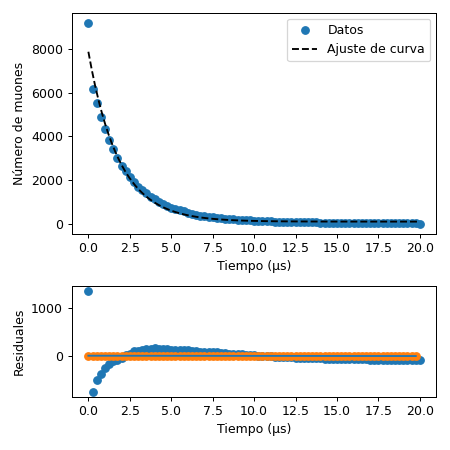

C:\Users\Acer\AppData\Local\Temp\ipykernel_19508\1277222602.py:2: RuntimeWarning: overflow encountered in exp
  return A*np.exp(-x*B)+C


In [165]:
fig, ax = plt.subplots(2,1, figsize=(5,5),gridspec_kw={'height_ratios': [2, 1]})

time_fit2 = np.linspace(0,20,81)
time_graph2 = np.linspace(0,20,100)
muon_graph2 = np.array([len(times_rawdata2)])

for i in range(0, len(F2)):
    muon_graph2 = np.append(muon_graph2, muon_graph2[i] - F2[i]) #remaining particles
    
params2, pcov2 = scipy.optimize.curve_fit(expfunction, time_fit2, muon_graph2)

residuals2 = muon_graph2 - expfunction(time_fit2,*params2)
    
ax[0].scatter(time_fit2,muon_graph2,label="Datos",marker="o")
ax[0].plot(time_graph2, expfunction(time_graph2,*params2),linestyle="--",label="Ajuste de curva",color="k")
ax[0].set_xlabel("Tiempo (μs)")
ax[0].set_ylabel("Número de muones")
ax[0].legend()

ax[1].scatter(time_fit2, residuals2, marker="o")
ax[1].set_ylabel("Residuales")
ax[1].set_xlabel("Tiempo (μs)")
plt.tight_layout()

plt.show()

In [166]:
params2, np.sqrt(np.diag(pcov2))

(array([7.79753367e+03, 5.47693126e-01, 8.72719000e+01]),
 array([1.33344567e+02, 1.60168497e-02, 2.85060018e+01]))

In [167]:
params22, pcov22 = scipy.optimize.curve_fit(expfunction2, time_fit2, muon_graph2)
params22, np.sqrt(np.diag(pcov22))

C:\Users\Acer\AppData\Local\Temp\ipykernel_19508\1277222602.py:5: RuntimeWarning: overflow encountered in exp
  return A*np.exp(-x*B)
C:\Users\Acer\AppData\Local\Temp\ipykernel_19508\1277222602.py:5: RuntimeWarning: overflow encountered in multiply
  return A*np.exp(-x*B)


(array([7.79538417e+03, 5.21635593e-01]),
 array([1.37103597e+02, 1.38293569e-02]))

In [168]:
muon_graph2_corrected = muon_graph2 - params2[2]
params23, pcov23 = scipy.optimize.curve_fit(expfunction, time_fit2, muon_graph2_corrected)
params23, np.sqrt(np.diag(pcov23))

C:\Users\Acer\AppData\Local\Temp\ipykernel_19508\1277222602.py:2: RuntimeWarning: overflow encountered in exp
  return A*np.exp(-x*B)+C
C:\Users\Acer\AppData\Local\Temp\ipykernel_19508\1277222602.py:2: RuntimeWarning: overflow encountered in multiply
  return A*np.exp(-x*B)+C


(array([ 7.79755762e+03,  5.47693102e-01, -1.28513396e-02]),
 array([1.33352080e+02, 1.60138902e-02, 2.85025223e+01]))

In [169]:
muon_graph2[:-1]

array([9225, 6158, 5523, 4890, 4349, 3853, 3407, 3004, 2656, 2392, 2123,
       1914, 1699, 1531, 1386, 1237, 1118,  985,  894,  806,  725,  659,
        607,  556,  504,  451,  409,  368,  344,  321,  299,  275,  247,
        227,  209,  197,  182,  175,  160,  147,  134,  121,  110,  103,
         99,   90,   87,   82,   75,   73,   65,   62,   59,   54,   52,
         47,   45,   40,   39,   38,   36,   32,   29,   29,   25,   22,
         21,   19,   18,   16,   15,   13,    9,    7,    6,    6,    4,
          4,    4,    2], dtype=int64)

In [170]:
params24, pcov24 = scipy.optimize.curve_fit(linearfunction, time_fit2[:-1], np.log(muon_graph2[:-1]))
params24, np.sqrt(np.diag(pcov24))

(array([-0.35084017,  8.5183425 ]), array([0.00458953, 0.05249821]))

In [171]:
plt.scatter(time_fit2[:-1], np.log(muon_graph2[:-1]))
plt.plot(time_fit2[:-1], linearfunction(time_fit2[:-1],*params24))

In [172]:
time_fit2

array([ 0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ,
        2.25,  2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,  4.  ,  4.25,
        4.5 ,  4.75,  5.  ,  5.25,  5.5 ,  5.75,  6.  ,  6.25,  6.5 ,
        6.75,  7.  ,  7.25,  7.5 ,  7.75,  8.  ,  8.25,  8.5 ,  8.75,
        9.  ,  9.25,  9.5 ,  9.75, 10.  , 10.25, 10.5 , 10.75, 11.  ,
       11.25, 11.5 , 11.75, 12.  , 12.25, 12.5 , 12.75, 13.  , 13.25,
       13.5 , 13.75, 14.  , 14.25, 14.5 , 14.75, 15.  , 15.25, 15.5 ,
       15.75, 16.  , 16.25, 16.5 , 16.75, 17.  , 17.25, 17.5 , 17.75,
       18.  , 18.25, 18.5 , 18.75, 19.  , 19.25, 19.5 , 19.75, 20.  ])

In [173]:
1/(0.35371463)

2.8271377974951166

In [174]:
tau_obs = 1/5e-1
tau_obs

2.0

In [123]:
1e-2/(5e-1)**2

0.04

In [124]:
muon_graph1_corrected = muon_graph1 - params1[2]

In [125]:
muon_graph1_corrected

array([ 2.04434383e+03,  1.06534383e+03,  6.72343833e+02,  4.11343833e+02,
        2.59343833e+02,  1.53343833e+02,  9.13438329e+01,  6.03438329e+01,
        3.43438329e+01,  1.63438329e+01,  6.34383294e+00,  3.43832944e-01,
       -6.56167056e-01, -3.65616706e+00, -5.65616706e+00, -6.65616706e+00,
       -7.65616706e+00, -9.65616706e+00, -1.06561671e+01, -1.46561671e+01,
       -2.16561671e+01])

In [126]:
params12, pcov12 = scipy.optimize.curve_fit(expfunction2, time_fit1, muon_graph1)

C:\Users\Acer\AppData\Local\Temp\ipykernel_19508\1277222602.py:5: RuntimeWarning: overflow encountered in exp
  return A*np.exp(-x*B)


In [127]:
params12, np.sqrt(np.diag(pcov12))

(array([2.01882851e+03, 5.30174265e-01]),
 array([3.09114588e+01, 1.46571581e-02]))

In [129]:
1/5.30174265e-1

1.8861722758270811

In [358]:
0.009/(4.84e-01)**2

0.038419506864285226

In [343]:
rho,tau_plus,tau_minus = sym.symbols("rho,tau_plus,tau_minus",real=True)
#tau_plus = 2.1969
#tau_minus = 2.043
eq = sym.Eq(tau_obs, (1+rho)*tau_minus*tau_plus/(rho*tau_minus + tau_plus))

In [344]:
sym.solve(eq,rho)

[tau_plus*(2.0 - tau_minus)/(tau_minus*(tau_plus - 2.0))]

In [340]:
hbarra = 6.582119569e-25 #GeV
m = 0.10566 #GeV

In [341]:
np.sqrt(192*np.pi**3*hbarra/(m**5*tau_obs*1e-6))

1.2197386717994762e-05

In [354]:
sigma_fermi = np.sqrt(192*np.pi**3*hbarra/(m**5)) * (0.04*1e-6) *np.sqrt(1/(tau_obs*1e-6)**3)/2
sigma_fermi

1.2197386717994762e-07

In [365]:
np.sqrt(192*np.pi**3*hbarra/(m**5*2.07*1e-6))

1.1989377051192723e-05

In [359]:
np.sqrt(192*np.pi**3*hbarra/(m**5)) * (0.04*1e-6) *np.sqrt(1/(2.07*1e-6)**3)/2

1.1583939179896353e-07